In [25]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Reading the encoded features from Neural Network
colomns=range(10)
learned_features=pd.read_csv('compressed_data2.csv',names=colomns)

In [4]:
#checking the shape and converting to numpy array
learned_features=learned_features.values
learned_features.shape

(890, 10)

In [5]:
#Extracting data for FFT
a=np.genfromtxt('data_for_clustering.csv', delimiter=',')
a=a[:-1]
print(a[1])
x=a[:250*910]
x=x[20*250:]
x=x.reshape(-1,250)
me=np.mean(x,axis=1)
x=(x.T-me).T
x.shape

39963.59


(890, 250)

In [16]:
#creating the sin and cos function for different frequency
siny=[]
cosy=[]
k = np.arange(250)
Fs=250
for f in range(1,31):
    siny.append(np.sin(2 * np.pi * f * k / Fs))
    cosy.append(np.cos(2 * np.pi * f * k / Fs))
siny[29][249]

-0.6845471059287116

In [17]:
siny=np.array(siny)
cosy=np.array(cosy)

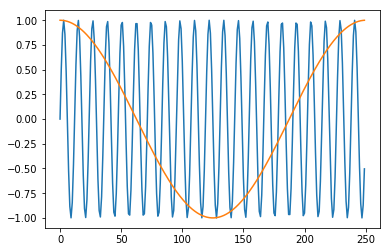

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(250),siny[20],label=1)
plt.plot(range(250),cosy[0],label=2)

In [21]:
sin=[]
cos=[]
for i in range(890):
    sin.append(np.sum(x[i]*siny,axis=1))
    cos.append(np.sum(x[i]*cosy,axis=1))
sin=np.array(sin)
cos=np.array(cos)
print(sin.shape)
sin=pow(sin,2)
cos=pow(cos,2)
fft=np.sqrt(sin+cos)
fft=fft.reshape(890,10,3)
fft=np.average(fft,axis=2)
print(fft.shape)

(890, 30)
(890, 10)


In [22]:
#Correlation between these fft and NN learned features
print(learned_features.shape,fft.shape)
#importing
from scipy.stats import linregress
#defining the correlation matrix with zeros
correlation_matrix=np.zeros((10,10))
#print(learned_features[0].shape)
#looping through and saving the correlation
for i in range(10):
    for j in range(10):
        slope, intercept, r_value, p_value, std_err=linregress(learned_features.T[j], fft.T[i])
        correlation_matrix[i][j]=r_value
        #if r_value greater than threshold print it with p_value
        if(r_value>0.1 or r_value<-0.1):
            #print(np.corrcoef(learned_features.T[j], fft.T[i]))
            print(r_value,p_value)
            print(i,j)
    #print()
print(correlation_matrix)

-1.4320906400680542 13672.270026601569
(890, 10) (890, 10)
0.10284650777625248 0.002125985741806168
6 1
0.11827910532100586 0.00040613452040226647
6 2
-0.11320022355778848 0.0007164086880147296
6 7
0.10740405736039699 0.0013321860807205092
8 6
[[ 0.06958719  0.02842751  0.02772306 -0.02637998 -0.02285942 -0.00833342
  -0.00156396  0.03267766 -0.02526091 -0.07483106]
 [ 0.0290206  -0.04062813 -0.00501358 -0.05351865 -0.02047009  0.02275571
   0.00476567  0.07003929 -0.06046122 -0.0242574 ]
 [-0.00727694  0.02252496 -0.05280473  0.02353104 -0.01531409  0.02258291
   0.05987608 -0.01266378 -0.02618449 -0.01023172]
 [ 0.02004602 -0.02874805  0.08984736 -0.02938975 -0.01596995 -0.00863247
  -0.05171425 -0.04954217  0.04663707  0.03117945]
 [ 0.04372257 -0.00659082 -0.00999408 -0.01012737 -0.02773009 -0.00252424
   0.01425316  0.01447287 -0.02682419  0.00131566]
 [-0.01466855  0.02187698  0.02094662 -0.02422175  0.0370918   0.08977435
   0.01038769 -0.03651474  0.05814491  0.0341509 ]
 [ 0.0

# plotting with different colors for PPT

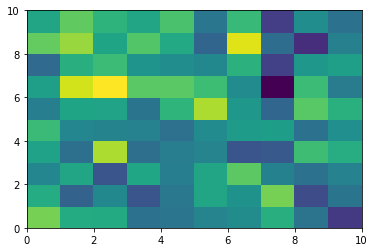

In [26]:
#showing the correlation matrix

data=correlation_matrix

Index= ['FFT 1-3', 'FFT 4-6','FFT 7-9','FFT 10-12','FFT 13-15','FFT 16-18', 'FFT 19-21','FFT 22-24','FFT 25-27','FFT 28-30']
Cols = range(10)
df = pd.DataFrame(data, index=Index, columns=Cols)

plt.pcolor(df)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

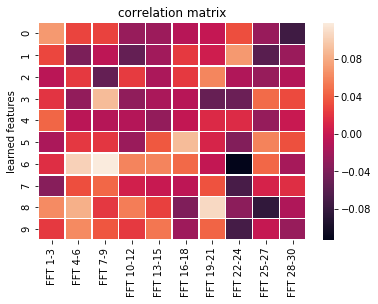

In [27]:
import seaborn as sns
ax = sns.heatmap(correlation_matrix, linewidth=0.5,xticklabels=Index)
plt.ylabel('learned features')
plt.title('correlation matrix')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

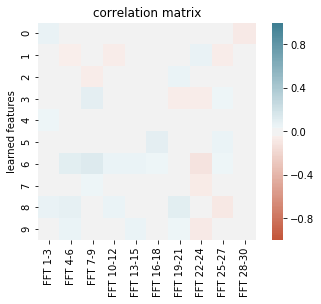

In [12]:
Index= ['FFT 1-3', 'FFT 4-6','FFT 7-9','FFT 10-12','FFT 13-15','FFT 16-18', 'FFT 19-21','FFT 22-24','FFT 25-27','FFT 28-30']

ax = sns.heatmap(
    correlation_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    xticklabels=Index
)

plt.ylabel('learned features')
plt.title('correlation matrix')
plt.show

# plotting for checking the values

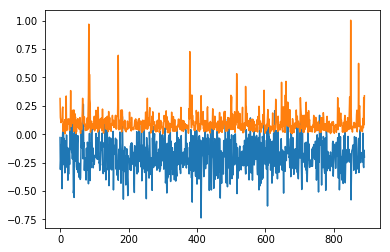

In [146]:
plt.plot(range(890),learned_features.T[1],label=1)
plt.plot(range(890),fft.T[1],label=1)

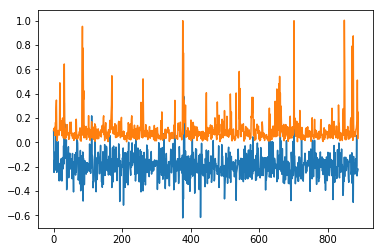

In [147]:
x1=learned_features.T[0]
x2=fft.T[0]
x1=x1/(max(x1)-min(x1))
x2=x2/(max(x2)-min(x2))
plt.plot(range(890),x1,label=1)
plt.plot(range(890),x2,label=1)

In [132]:
#%matplotlib widget
#upto=100
#plt.plot(range(upto),fft.T[0][0:upto],label=1)
#plt.plot(range(upto),learned_features.T[0][0:upto],label=1)

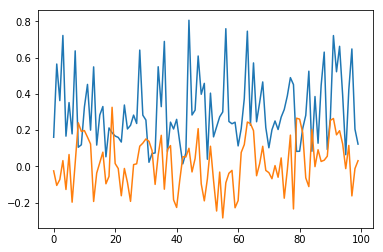

In [48]:
upto=100
for i in [9]:
    for j in [0]:
        #plt.subplot(2,2,j+1)
        plt.plot(range(upto),fft.T[24][0:upto],label=1)
        plt.plot(range(upto),learned_features.T[28][0:upto],label=1)

In [ ]:
#np.corrcoef(fft[0],learned_features[0])[0][1]

In [49]:
#fft=fft.T
#learned_features=learned_features.T
for i in range(1,100):
    if (np.corrcoef(fft[i],learned_features[i])[0][1]>0.5 or np.corrcoef(fft[i],learned_features[i])[0][1]<-0.5):
        print(np.corrcoef(fft[i],learned_features[j])[0][1],end=' , ')
  


0.18062586455376736 , 0.40244858784386417 , 0.38807807533609 , 0.2225162207458453 , 0.4392188100152386 , 0.2629188331110414 , 

In [50]:
#print(np.corrcoef(fft.T,learned_features.T)[0])

In [51]:
fft[0]

array([41016.8100798 , 20931.42886148, 13607.91678796, 22542.20107102,
        8835.57533357,  8364.20133738,  8840.81161161,  6075.42573306,
        4373.70374784,  3986.88007061])

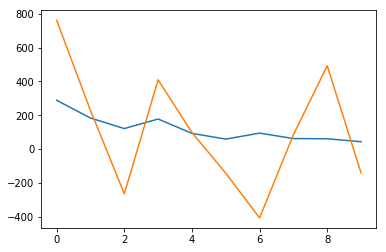

In [19]:
plt.plot(range(10),fft[5]/100,label=1)
plt.plot(range(10),learned_features[5],label=2)

# correlation between 2 instances of learned features from same NN

In [1]:
import pandas as pd
import numpy as np

In [29]:
colomns=range(20)
learned_features1=pd.read_csv('compressed_data20-0.csv',names=colomns)
learned_features2=pd.read_csv('compressed_data20-1.csv',names=colomns)

In [32]:
from scipy.stats import linregress
correlation_matrix=np.zeros((20,20))
#print(learned_features[0].shape)
for i in range(20):
    for j in range(20):
        slope, intercept, r_value, p_value, std_err=linregress(learned_features1.T[j], learned_features2.T[i])
        correlation_matrix[i][j]=r_value
        if(r_value>0.5 or r_value<-0.5):
            #print(np.corrcoef(learned_features.T[j], fft.T[i]))
            print(r_value,p_value)
            print(i,j)
    #print()
#print(np.corrcoef(learned_features.T[i], fft.T[j]))
print(correlation_matrix)

0.5217735163851521 0.01829308358004156
13 13
0.5417896956221263 0.013606874724887948
14 19
-0.6519132176684547 0.0018420844915297285
15 19
-0.7415787856388758 0.0001824685638069057
16 19
0.5725623158796901 0.008330134671967502
19 18
[[ 0.24324023 -0.02535404  0.04637824 -0.0167304   0.06878557  0.0117842
  -0.19151211  0.15893985  0.06521525  0.09868288  0.19919527  0.1718151
   0.34779908  0.26739671  0.14384848 -0.10519485 -0.13297958 -0.31702953
   0.01309254  0.05513255]
 [ 0.0295411  -0.18169111  0.33202991  0.10776255 -0.12215252 -0.3106869
   0.10795811 -0.22770607 -0.15064581 -0.21291828 -0.02507658 -0.2054112
   0.21138053  0.19100814  0.08021946  0.18313498  0.19204191  0.30619679
   0.04724997  0.24094044]
 [ 0.31864354  0.10638307 -0.23188666  0.03305867  0.20146124  0.39669624
  -0.12851629  0.39147551 -0.21521922 -0.0902368  -0.00091512  0.06775607
   0.1299135  -0.04630325 -0.11112743 -0.09590154 -0.46000949 -0.06057974
  -0.12755898  0.2397127 ]
 [-0.20314956  0.0596048

<function matplotlib.pyplot.show(*args, **kw)>

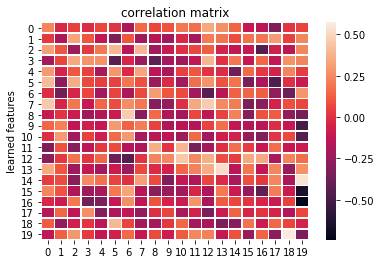

In [31]:
import seaborn as sns
Index= ['FFT 1-3', 'FFT 4-6','FFT 7-9','FFT 10-12','FFT 13-15','FFT 16-18', 'FFT 19-21','FFT 22-24','FFT 25-27','FFT 28-30']
import matplotlib.pyplot as plt
ax = sns.heatmap(correlation_matrix, linewidth=0.5)
plt.ylabel('learned features')
plt.title('correlation matrix')
plt.show

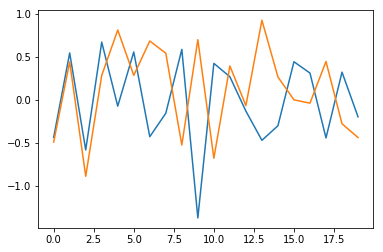

In [34]:
n=10
plt.plot(range(20),learned_features1.T[n],label=1)
plt.plot(range(20),learned_features2.T[n],label=2)